# Corona - German mortality and vaccination timeseries

## Data sources:

1. Mortality statistics for the years 2000 to 2015: [de_statis: Deutschland Sterbefälle 2000-2015](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle-endgueltige-daten.html;jsessionid=7C42BA66C2036FF4141E5AC46AD386D5.live712?nn=209016)
2. Mortality statistics for the years 2016 to 2022 (Aug 21): [de_statis: Deutschland Sterbefälle 2016-2022 ](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Sterbefaelle-Lebenserwartung/Tabellen/sonderauswertung-sterbefaelle.html)
3. Vaccination statistics from 2020 onwards: [impfdashboard.de - Daten zum Downlad](https://impfdashboard.de/daten)


rough outline of the next steps:

1. import the mortality data as a continuous week based time series beginning with the first week of 2010 as index week 1
    - import the data based on maximum granularity regarding sex and age group
    - compose aggregating views 
    - 


2. import the vaccination data as continuous week based time series
    - get acquainted with the data model
    - see from there
    

3. go and find people already doing analysis on the data, esp. 
    - go and explain this finding: [Starker statistischer Zusammenhang zwischen der Covid-19-Impfquote und der Übersterblichkeit](https://idw-online.de/de/news786629)
    - German statistics computes excess mortality as the difference between the median value for the same timeframes of the four previous years: [WHO-Studie zur Corona-Übersterblichkeit nutzt störanfällige Methode](https://www.rwi-essen.de/presse/wissenschaftskommunikation/unstatistik/detail/who-studie-zur-corona-uebersterblichkeit-nutzt-stoeranfaellige-methode)




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook  
import matplotlib.pyplot as plt

In [3]:
# import requirements

import pandas as pd
import pprint
import statistics
import numpy as np
#import seaborn as sns
#sns.set_theme(style="darkgrid")

<IPython.core.display.Javascript object>


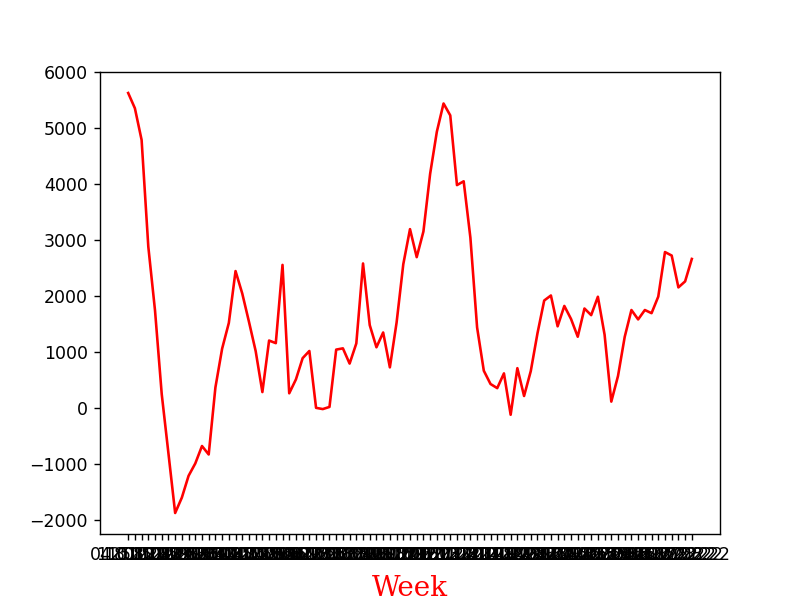

In [5]:
# import mortality data and calculate excess and change

sterbefaelle = pd.read_csv('../data/deaths/sterbefaelle-2010-2022-je-woche.csv', delimiter=';')

# calculate excess mortality per week following the difference between actual data point 
# and "median of the four prior corresponding data points" methond of  de_statis

i = 0
for x in sterbefaelle.iterrows():    
    sterbefaelle.iloc[3,10]
    if sterbefaelle.loc[i,"week_index"] >= 209:
        sterbefaelle.loc[i,"total_median"] = statistics.median([sterbefaelle["total"][i-208],sterbefaelle["total"][i-156],sterbefaelle["total"][i-104],sterbefaelle["total"][i-52]])
        sterbefaelle.loc[i,"total_excess"] = sterbefaelle["total"][i] - sterbefaelle["total_median"][i]   
    else:
        sterbefaelle["total_median"] = 0
        sterbefaelle["total_excess"] = 0
        
    if sterbefaelle.loc[i,"week_index"] >= 210:  
        sterbefaelle.loc[i,"change_median"]       = 1 - (sterbefaelle["total_median"][i]/sterbefaelle["total_median"][i-1])  
        sterbefaelle.loc[i,"change_excess"]       = 1 - (sterbefaelle["total_excess"][i]/sterbefaelle["total_excess"][i-1])
    else: 
        sterbefaelle.loc[i,"change_median"] = 0
        sterbefaelle.loc[i,"change_excess"] = 0
    
    i = i+1

# plot total excess mortality
x = sterbefaelle.loc[574:,"monday"]
y = sterbefaelle.loc[574:,"total_excess"]


plt.plot(x, y, "r")
plt.xlabel("Week", 
           family='serif', 
           color='r', 
           weight='normal', 
           size = 16,
           labelpad = 6)

plt.show()

In [12]:
# import vaccination data 

vaccinations = pd.read_csv('../data/vaccinations/germany_vaccinations_timeseries_v3.tsv', sep='\t')
vaccinations



,date,impfungen,impfungen_kumulativ,impfungen_biontech,impfungen_biontech_kumulativ,impfungen_biontech_min1,impfungen_biontech_min1_kumulativ,impfungen_biontech_gi,impfungen_biontech_gi_kumulativ,impfungen_biontech_boost1,...,personen_boost1,personen_boost1_kumulativ,impfungen_boost1,impfungen_boost1_kumulativ,impfquote_boost1,personen_boost2,personen_boost2_kumulativ,impfungen_boost2,impfungen_boost2_kumulativ,impfquote_boost2
0,2020-12-27,24429,24429,24420,24420,24420,24420,0,0,0,...,0,0,0,0,0.00000,0,0,0,0,0.00000
1,2020-12-28,18007,42436,18005,42425,18005,42425,0,0,0,...,0,0,0,0,0.00000,0,0,0,0,0.00000
2,2020-12-29,50065,92501,50064,92489,50064,92489,0,0,0,...,0,0,0,0,0.00000,0,0,0,0,0.00000
3,2020-12-30,64088,156589,64087,156576,64087,156576,0,0,0,...,0,0,0,0,0.00000,0,0,0,0,0.00000
4,2020-12-31,49939,206528,49937,206513,49937,206513,0,0,0,...,0,0,0,0,0.00000,0,0,0,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,2022-08-29,14930,184635561,13111,136503185,368,46564969,523,51179138,2219,...,2535,51553175,2535,51553175,0.61996,11285,7183248,11285,7183248,0.08638
611,2022-08-30,30191,184665752,27560,136530745,556,46565525,877,51180015,4015,...,4340,51557515,4340,51557515,0.62002,24211,7207459,24211,7207459,0.08667
612,2022-08-31,33407,184699159,30490,136561235,674,46566199,1010,51181025,4782,...,5138,51562653,5138,51562653,0.62008,26375,7233834,26375,7233834,0.08699
613,2022-09-01,29897,184729056,27665,136588900,603,46566802,831,51181856,4059,...,4387,51567040,4387,51567040,0.62013,23861,7257695,23861,7257695,0.08728


In [13]:
sterbefaelle.loc[570:,]

,week_index,year,monday,total,0_30,30_35,35_40,40_45,45_50,50_55,...,70_75,75_80,80_85,85_90,90_95,gt_95,total_median,total_excess,change_median,change_excess
570,571,2020,07.12.20,24003,130,44,76,129,203,429,...,1857,2837,4901,4862,3686,1566,18694.5,5308.5,-0.006840,-0.315124
571,572,2020,14.12.20,24724,106,57,96,119,172,398,...,1926,2899,5092,5054,3879,1547,19026.0,5698.0,-0.017732,-0.073373
572,573,2020,21.12.20,25554,147,51,91,123,171,398,...,1981,2977,5304,5218,4013,1707,18428.0,7126.0,0.031431,-0.250614
573,574,2020,28.12.20,25541,126,49,84,114,203,444,...,1882,2976,5379,5085,4013,1634,19112.5,6428.5,-0.037145,0.097881
574,575,2021,04.01.21,24919,110,47,72,114,183,444,...,1908,2864,5181,4965,3901,1611,19289.0,5630.0,-0.009235,0.124212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,655,2022,18.07.22,20762,156,61,84,126,168,393,...,1868,2200,4094,4152,2952,1281,17976.5,2785.5,-0.071369,-0.400452
655,656,2022,25.07.22,20045,140,56,85,129,168,362,...,1749,2203,3898,4071,2806,1294,17322.0,2723.0,0.036409,0.022438
656,657,2022,01.08.22,19399,132,41,80,110,156,339,...,1697,1965,3909,4025,2779,1206,17245.5,2153.5,0.004416,0.209144
657,658,2022,08.08.22,19486,133,51,71,137,174,376,...,1741,2087,3763,3908,2766,1225,17225.0,2261.0,0.001189,-0.049919
